<a href="https://colab.research.google.com/github/tsaqifammar/fuzzy-logic-top10-restaurant/blob/main/tugas_pengantar_ai_fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas Pengantar AI 2**

### **Kelompok 14 (IF-43-06) :**
- Ivan Ryansyach (1301194150)
- Muhammad Tsaqif Ammar (1301194222)
- Mar'i Fauzan Rambe (1301194204)

### **Deskripsi Tugas**

Diberikan file `restoran.xls` berupa himpunan data 100 restoran yang ada di kota A dengan dua atribut: **Kualitas pelayanan** (bilangan real 1-100) dan **kualitas makanan** (bilangan real 1-10). Bangunlah sebuah sistem berbasis *fuzzy logic* untuk memilih 10 restoran terbaik di kota A. Sistem membaca masukan file `restoran.xls` dan mengeluarkan output berupa sebuah file `peringkat.xls` yang berisi satu vektor kolom berisi 10 baris angka bernilai integer (bilangan bulat) yang menyatakan nomor baris/record id restoran (1-100) pada file `restoran.xls`.

### **Library yang dibutuhkan**


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### **Mengimport Data Restoran**

In [ ]:
# Import data restoran
data_restoran = pd.read_excel("https://github.com/tsaqifammar/fuzzy-logic-top10-restaurant/blob/main/restoran.xlsx?raw=true")
data_restoran

,id,pelayanan,makanan
0,1,58,7
1,2,54,1
2,3,98,2
3,4,52,4
4,5,11,4
...,...,...,...
95,96,30,1
96,97,25,3
97,98,27,10
98,99,8,6


### **Fungsi Keanggotaan**

In [ ]:
def trapesium(x, a, b, c, d):
  if x <= a :
    if a == b :
      return 1
    return 0
  elif x >= d :
    if c == d :
      return 1
    return 0
  elif a < x < b :
    return (x - a)/(b - a)
  elif b <= x <= c :
    return 1
  return -(x - d)/(d-c)

def segitiga(x, a, b, c):
  if x <= a or x >= c :
    return 0
  elif a < x <= b :
    return (x - a)/(b - a)
  return -(x - c)/(c - b)

### **Fungsi Keanggotaan Kualitas Pelayanan**

Diberikan input **Kualitas Pelayanan** dengan nilai bilangan real antara 1-100. Berikut bentuk dan batas tiap nilai linguistik untuk fungsi keanggotaan input Kualitas Pelayanan : 
* Sangat Buruk (Trapesium) : 0-0-10-30
* Buruk (Segitiga) : 10-30-50
* Sedang (Segitiga) : 30-50-70
* Baik (Segitiga) : 50-70-90
* Sangat Baik (Trapesium) : 70-90-100-100

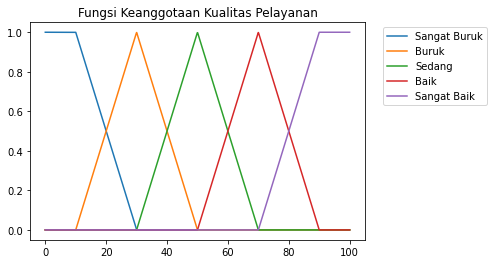

In [ ]:
# Batas-batas fungsi keanggotaan tiap nilai linguistik
batas_p = [
  [0,0,10,30],
  [10,30,50],
  [30,50,70],
  [50,70,90],
  [70,90,100,100]
]

# Fungsi Keanggotaan untuk tiap nilai linguistik
fk_p = [
  lambda x : trapesium(x, *batas_p[0]),
  lambda x : segitiga(x, *batas_p[1]),
  lambda x : segitiga(x, *batas_p[2]),
  lambda x : segitiga(x, *batas_p[3]),
  lambda x : trapesium(x, *batas_p[4])
]

# Graf FK Kualitas Pelayanan
labels = ["Sangat Buruk", "Buruk", "Sedang", "Baik", "Sangat Baik"]
p_x = np.linspace(0,100,1000)
for i in range(5):
  plt.plot(p_x, [fk_p[i](x) for x in p_x], label=labels[i])
plt.title("Fungsi Keanggotaan Kualitas Pelayanan")
plt.legend(bbox_to_anchor=(1.04,1))
plt.show()

### **Fungsi Keanggotaan Kualitas Makanan**

Diberikan input **Kualitas Makanan** dengan nilai bilangan real antara 1-10. Berikut bentuk dan batas tiap nilai linguistik untuk fungsi keanggotaan input Kualitas Pelayanan : 
* Sangat Tidak Lezat (Trapesium) : 0-0-1-3
* Tidak Lezat (Segitiga) : 1-3-5
* Rata-rata (Segitiga) : 3-5-7
* Lezat (Segitiga) : 5-7-9
* Sangat Lezat (Trapesium) : 7-9-10-10

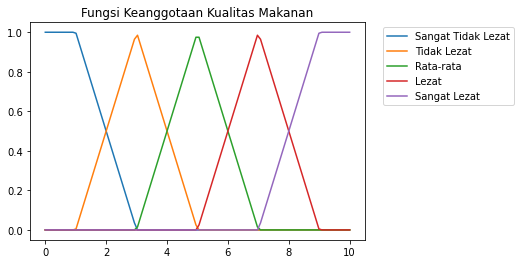

In [ ]:
batas_m = [
  [0,0,1,3],
  [1,3,5],
  [3,5,7],
  [5,7,9],
  [7,9,10,10]
]

fk_m = [
      lambda x : trapesium(x, *batas_m[0]),
      lambda x : segitiga(x, *batas_m[1]),
      lambda x : segitiga(x, *batas_m[2]),
      lambda x : segitiga(x, *batas_m[3]),
      lambda x : trapesium(x, *batas_m[4])
]

# Graf FK Kualitas Makanan
labels = ["Sangat Tidak Lezat", "Tidak Lezat", "Rata-rata", "Lezat", "Sangat Lezat"]

m_x = np.linspace(0,10,100)
for i in range(5):
  plt.plot(m_x, [fk_m[i](x) for x in m_x], label=labels[i])
plt.title("Fungsi Keanggotaan Kualitas Makanan")
plt.legend(bbox_to_anchor=(1.04,1))
plt.show()

### **Fuzzifikasi**

In [ ]:
def fuzzifikasi(p, m):
  member_p = [0]*5
  member_m = [0]*5

  # Untuk tiap kategori kualitas pelayanan, hitung membership value nya
  for i in range(5):
    member_p[i] = fk_p[i](p)

  # Untuk tiap kategori kualitas makanan, hitung membership value nya
  for i in range(5):
    member_m[i] = fk_m[i](m)
    
  return member_p, member_m

### **Aturan Inferensi**

| **P\M**          | **Sangat Tidak Lezat** | **Tidak Lezat**   | **Rata-rata** | **Lezat**        | **Sangat Lezat** |
|-------------|-------------------|--------------|------------|-------------|-------------|
| **Sangat Buruk** | Sangat Buruk      | Sangat Buruk | Buruk      | Buruk       | Sedang      |
| **Buruk**        | Sangat Buruk      | Buruk        | Buruk      | Sedang      | Baik        |
| **Sedang**       | Buruk             | Buruk        | Sedang     | Baik        | Baik        |
| **Baik**         | Buruk             | Sedang       | Baik       | Baik        | Sangat Baik |
| **Sangat Baik**  | Sedang            | Baik         | Baik       | Sangat Baik | Sangat Baik |

Pada code di bawah, kami melabeli tiap kategori hasil inferensi dengan angka sebagai berikut :
* 0 : Sangat Buruk
* 1 : Buruk
* 2 : Sedang
* 3 : Baik
* 4 : Sangat Baik

Ini dilakukan untuk memudahkan indexing dengan array pada code.

In [ ]:
# Tentuin aturan inferensi
inferensi = [
  [0,0,1,1,2],
  [0,1,1,2,3],
  [1,1,2,3,3],
  [1,2,3,3,4],
  [2,3,3,4,4]
]

def keanggotaan_inferensi(p, m):
  member_p, member_m = fuzzifikasi(p, m)

  # Untuk tiap kategori inferensi, hitung membership value nya
  member_inf = [0]*5
  for i in range(5):
    for j in range(5):
      mini = min(member_p[i], member_m[j])
      kat_inf = inferensi[i][j]
      if mini > member_inf[kat_inf]:
        member_inf[kat_inf] = mini

  return member_inf

### **Metode Defuzzifikasi**

Disini kami menggunakan metode defuzzifikasi dengan model Sugeno. Adapun multiplier untuk tiap kategori hasil inferensi :
* Sangat Buruk : 20
* Buruk : 40
* Sedang : 60
* Baik : 80
* Sangat Baik : 100

In [ ]:
def defuzzifikasi(member_inf):
  # Dengan model sugeno
  mul = [20, 40, 60, 80, 100]
  score = sum([member_inf[i]*mul[i] for i in range(5)])
  return score/sum(member_inf)

### **Menghitung Nilai Kelayakan**

In [ ]:
def compute_score(p, m):
  member_inf = keanggotaan_inferensi(p,m)
  return defuzzifikasi(member_inf)

### **Seleksi 10 Restoran Terbaik**

In [ ]:
data_restoran['nilai_kelayakan'] = data_restoran.apply(lambda row : compute_score(row.pelayanan, row.makanan), axis=1)

top_restoran = data_restoran.sort_values(by=['nilai_kelayakan'], ascending=False)

top_restoran.head(10)

# Export 'peringkat.xls' berisi id 10 restoran terbaik
top_restoran = top_restoran.drop(["pelayanan", "makanan", "nilai_kelayakan"], axis=1)
top_restoran[0:10].to_excel("peringkat.xls", index=False, header=False)

,id,pelayanan,makanan,nilai_kelayakan
23,24,100,9,100.0
21,22,79,9,100.0
30,31,74,9,100.0
78,79,87,9,100.0
68,69,86,10,100.0
41,42,94,10,100.0
53,54,64,10,94.0
24,25,61,10,91.0
94,95,63,8,90.0
82,83,69,8,90.0
